## 데이터 준비

In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline


In [2]:
# 데이터 준비
def dataReady(x):
    boxOffice = pd.read_excel('data/' + x)
    boxOffice.columns = ['순위', '영화명', '개봉일', '매출액', '매출액 점유율', '관객수', '스크린수', '상영횟수', '대표국적', '국적', '배급사']
    boxOffice = boxOffice.drop([0, 1]) 
    boxOffice = boxOffice.reset_index()
    del boxOffice["index"]
    return boxOffice


In [3]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False
elif platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print("Error...")

In [4]:
boxOffice2018X = "연도별박스오피스_2018년.xlsx"
boxOffice2017X = "연도별박스오피스_2017년.xlsx"
boxOffice2016X = "연도별박스오피스_2016년.xlsx"
boxOffice2015X = "연도별박스오피스_2015년.xlsx"
boxOffice2014X = "연도별박스오피스_2014년.xlsx"
boxOffice2013X = "연도별박스오피스_2013년.xlsx"
boxOffice2012X = "연도별박스오피스_2012년.xlsx"
boxOffice2011X = "연도별박스오피스_2011년.xlsx"
boxOffice2010X = "연도별박스오피스_2010년.xlsx"
boxOffice2009X = "연도별박스오피스_2009년.xlsx"
boxOffice2008X = "연도별박스오피스_2008년.xlsx"
boxOffice2007X = "연도별박스오피스_2007년.xlsx"
boxOffice2006X = "연도별박스오피스_2006년.xlsx"
boxOffice2005X = "연도별박스오피스_2005년.xlsx"
boxOffice2004X = "연도별박스오피스_2004년.xlsx"

boxOffice2018 = dataReady(boxOffice2018X)
boxOffice2017 = dataReady(boxOffice2017X)
boxOffice2016 = dataReady(boxOffice2016X)
boxOffice2015 = dataReady(boxOffice2015X)
boxOffice2014 = dataReady(boxOffice2014X)
boxOffice2013 = dataReady(boxOffice2013X)
boxOffice2012 = dataReady(boxOffice2012X)
boxOffice2011 = dataReady(boxOffice2011X)
boxOffice2010 = dataReady(boxOffice2010X)
boxOffice2009 = dataReady(boxOffice2009X)
boxOffice2008 = dataReady(boxOffice2008X)
boxOffice2007 = dataReady(boxOffice2007X)
boxOffice2006 = dataReady(boxOffice2006X)
boxOffice2005 = dataReady(boxOffice2005X)
boxOffice2004 = dataReady(boxOffice2004X)


In [5]:
boxOffice2018.head()

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,1,신과함께-인과 연,2018-08-01 00:00:00,102659887909,0.065,12274163,2235,179991,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트
1,2,어벤져스: 인피니티 워,2018-04-25 00:00:00,99926399769,0.063,11212710,2553,240553,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
2,3,미션 임파서블: 폴아웃,2018-07-25 00:00:00,55888375112,0.035,6584915,1957,101375,미국,미국,롯데컬처웍스(주)롯데엔터테인먼트
3,4,신과함께-죄와 벌,2017-12-20 00:00:00,47356539705,0.03,5872180,1644,121975,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
4,5,쥬라기 월드: 폴른 킹덤,2018-06-06 00:00:00,49770711037,0.031,5661128,1972,144779,미국,미국,유니버설픽쳐스인터내셔널 코리아(유)


In [6]:
type(boxOffice2018)

pandas.core.frame.DataFrame

In [7]:
boxOffice2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 11 columns):
순위         4510 non-null object
영화명        4509 non-null object
개봉일        2828 non-null object
매출액        4510 non-null object
매출액 점유율    4509 non-null object
관객수        4510 non-null object
스크린수       4510 non-null object
상영횟수       4510 non-null object
대표국적       4434 non-null object
국적         4432 non-null object
배급사        2511 non-null object
dtypes: object(11)
memory usage: 387.7+ KB


In [8]:
boxOffice2018.shape

(4510, 11)

In [9]:
boxOffice2017.head()

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,1,택시운전사,2017-08-02 00:00:00,95853645649,0.055,12186327,1906,184075,한국,한국,(주)쇼박스
1,2,신과함께-죄와 벌,2017-12-20 00:00:00,68350496432,0.039,8539495,1912,91301,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
2,3,공조,2017-01-18 00:00:00,63783051326,0.036,7817618,1392,142989,한국,한국,씨제이이앤엠(주)
3,4,스파이더맨: 홈 커밍,2017-07-05 00:00:00,59125813820,0.034,7258678,1965,164448,미국,미국,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점
4,5,범죄도시,2017-10-03 00:00:00,56318014149,0.032,6879841,1315,149334,한국,한국,"메가박스중앙(주)플러스엠,(주)키위미디어그룹"


In [10]:
type(boxOffice2017)

pandas.core.frame.DataFrame

In [11]:
boxOffice2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 11 columns):
순위         4807 non-null object
영화명        4806 non-null object
개봉일        2938 non-null object
매출액        4807 non-null object
매출액 점유율    4806 non-null object
관객수        4807 non-null object
스크린수       4807 non-null object
상영횟수       4807 non-null object
대표국적       4754 non-null object
국적         4753 non-null object
배급사        2671 non-null object
dtypes: object(11)
memory usage: 413.2+ KB


In [12]:
boxOffice2017.shape

(4807, 11)

## 데이터 합치기

In [13]:
# 데이터 합치기
df0 = pd.concat([boxOffice2018, boxOffice2017, boxOffice2016, boxOffice2015, boxOffice2014, boxOffice2013, boxOffice2012, boxOffice2011, boxOffice2010, boxOffice2009, boxOffice2008, boxOffice2007, boxOffice2006, boxOffice2005, boxOffice2004,], ignore_index=True)
df0

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,1,신과함께-인과 연,2018-08-01 00:00:00,102659887909,0.065,12274163,2235,179991,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트
1,2,어벤져스: 인피니티 워,2018-04-25 00:00:00,99926399769,0.063,11212710,2553,240553,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
2,3,미션 임파서블: 폴아웃,2018-07-25 00:00:00,55888375112,0.035,6584915,1957,101375,미국,미국,롯데컬처웍스(주)롯데엔터테인먼트
3,4,신과함께-죄와 벌,2017-12-20 00:00:00,47356539705,0.03,5872180,1644,121975,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
4,5,쥬라기 월드: 폴른 킹덤,2018-06-06 00:00:00,49770711037,0.031,5661128,1972,144779,미국,미국,유니버설픽쳐스인터내셔널 코리아(유)
5,6,앤트맨과 와스프,2018-07-04 00:00:00,47466829685,0.03,5447981,1775,148243,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
6,7,안시성,2018-09-19 00:00:00,46317920026,0.029,5437338,1538,110387,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
7,8,블랙 팬서,2018-02-14 00:00:00,45885123957,0.029,5399227,1620,119212,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
8,9,1987,2017-12-27 00:00:00,42914036108,0.027,5289949,1122,110604,한국,한국,씨제이이앤엠(주)
9,10,독전,2018-05-22 00:00:00,43484892913,0.027,5063620,1532,140009,한국,한국,(주)넥스트엔터테인먼트월드(NEW)


In [14]:
type(df0)

pandas.core.frame.DataFrame

In [15]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36036 entries, 0 to 36035
Data columns (total 11 columns):
순위         36036 non-null object
영화명        36016 non-null object
개봉일        21462 non-null object
매출액        36036 non-null object
매출액 점유율    36021 non-null object
관객수        36036 non-null object
스크린수       36036 non-null object
상영횟수       36036 non-null object
대표국적       35369 non-null object
국적         35351 non-null object
배급사        18771 non-null object
dtypes: object(11)
memory usage: 3.0+ MB


In [16]:
df0.shape

(36036, 11)

In [17]:
df0.head()

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,1,신과함께-인과 연,2018-08-01 00:00:00,102659887909,0.065,12274163,2235,179991,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트
1,2,어벤져스: 인피니티 워,2018-04-25 00:00:00,99926399769,0.063,11212710,2553,240553,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
2,3,미션 임파서블: 폴아웃,2018-07-25 00:00:00,55888375112,0.035,6584915,1957,101375,미국,미국,롯데컬처웍스(주)롯데엔터테인먼트
3,4,신과함께-죄와 벌,2017-12-20 00:00:00,47356539705,0.03,5872180,1644,121975,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
4,5,쥬라기 월드: 폴른 킹덤,2018-06-06 00:00:00,49770711037,0.031,5661128,1972,144779,미국,미국,유니버설픽쳐스인터내셔널 코리아(유)


In [18]:
df0.columns

Index(['순위', '영화명', '개봉일', '매출액', '매출액 점유율', '관객수', '스크린수', '상영횟수', '대표국적',
       '국적', '배급사'],
      dtype='object')

In [19]:
df0.info

<bound method DataFrame.info of         순위                  영화명                  개봉일           매출액 매출액 점유율  \
0        1            신과함께-인과 연  2018-08-01 00:00:00  102659887909   0.065   
1        2         어벤져스: 인피니티 워  2018-04-25 00:00:00   99926399769   0.063   
2        3         미션 임파서블: 폴아웃  2018-07-25 00:00:00   55888375112   0.035   
3        4            신과함께-죄와 벌  2017-12-20 00:00:00   47356539705    0.03   
4        5        쥬라기 월드: 폴른 킹덤  2018-06-06 00:00:00   49770711037   0.031   
5        6             앤트맨과 와스프  2018-07-04 00:00:00   47466829685    0.03   
6        7                  안시성  2018-09-19 00:00:00   46317920026   0.029   
7        8                블랙 팬서  2018-02-14 00:00:00   45885123957   0.029   
8        9                 1987  2017-12-27 00:00:00   42914036108   0.027   
9       10                   독전  2018-05-22 00:00:00   43484892913   0.027   
10      11                   공작  2018-08-08 00:00:00   42788445176   0.027   
11      12               완벽한 타인 

In [20]:
df1=df0[['매출액','스크린수']].head()

from sklearn import preprocessing

sc = preprocessing.StandardScaler()
result = sc.fit_transform(df1)
df1 = pd.DataFrame(result)

/home/mll/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mll/.local/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


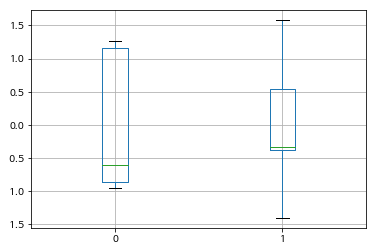

In [21]:
df1.boxplot()

In [22]:
df1.info

<bound method DataFrame.info of           0         1
0  1.271368  0.534222
1  1.161180  1.577727
2 -0.614007 -0.378025
3 -0.957928 -1.405122
4 -0.860612 -0.328803>

In [23]:
df1.shape

(5, 2)

In [24]:
df0

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,1,신과함께-인과 연,2018-08-01 00:00:00,102659887909,0.065,12274163,2235,179991,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트
1,2,어벤져스: 인피니티 워,2018-04-25 00:00:00,99926399769,0.063,11212710,2553,240553,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
2,3,미션 임파서블: 폴아웃,2018-07-25 00:00:00,55888375112,0.035,6584915,1957,101375,미국,미국,롯데컬처웍스(주)롯데엔터테인먼트
3,4,신과함께-죄와 벌,2017-12-20 00:00:00,47356539705,0.03,5872180,1644,121975,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
4,5,쥬라기 월드: 폴른 킹덤,2018-06-06 00:00:00,49770711037,0.031,5661128,1972,144779,미국,미국,유니버설픽쳐스인터내셔널 코리아(유)
5,6,앤트맨과 와스프,2018-07-04 00:00:00,47466829685,0.03,5447981,1775,148243,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
6,7,안시성,2018-09-19 00:00:00,46317920026,0.029,5437338,1538,110387,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
7,8,블랙 팬서,2018-02-14 00:00:00,45885123957,0.029,5399227,1620,119212,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
8,9,1987,2017-12-27 00:00:00,42914036108,0.027,5289949,1122,110604,한국,한국,씨제이이앤엠(주)
9,10,독전,2018-05-22 00:00:00,43484892913,0.027,5063620,1532,140009,한국,한국,(주)넥스트엔터테인먼트월드(NEW)


In [25]:
df0=df0.set_index('영화명')
df0

,순위,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
영화명,,,,,,,,,,
신과함께-인과 연,1,2018-08-01 00:00:00,102659887909,0.065,12274163,2235,179991,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트
어벤져스: 인피니티 워,2,2018-04-25 00:00:00,99926399769,0.063,11212710,2553,240553,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
미션 임파서블: 폴아웃,3,2018-07-25 00:00:00,55888375112,0.035,6584915,1957,101375,미국,미국,롯데컬처웍스(주)롯데엔터테인먼트
신과함께-죄와 벌,4,2017-12-20 00:00:00,47356539705,0.03,5872180,1644,121975,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
쥬라기 월드: 폴른 킹덤,5,2018-06-06 00:00:00,49770711037,0.031,5661128,1972,144779,미국,미국,유니버설픽쳐스인터내셔널 코리아(유)
앤트맨과 와스프,6,2018-07-04 00:00:00,47466829685,0.03,5447981,1775,148243,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
안시성,7,2018-09-19 00:00:00,46317920026,0.029,5437338,1538,110387,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
블랙 팬서,8,2018-02-14 00:00:00,45885123957,0.029,5399227,1620,119212,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
1987,9,2017-12-27 00:00:00,42914036108,0.027,5289949,1122,110604,한국,한국,씨제이이앤엠(주)


In [26]:
df0.columns

Index(['순위', '개봉일', '매출액', '매출액 점유율', '관객수', '스크린수', '상영횟수', '대표국적', '국적',
       '배급사'],
      dtype='object')

In [27]:
max =['매출액', '매출액 점유율', '관객수', '스크린수',  '대표국적', '상영횟수']

In [28]:
df2 = df0[max]
df2 = df2[pd.notnull(df2.index)] # NaN index 지움

In [29]:
df2

,매출액,매출액 점유율,관객수,스크린수,대표국적,상영횟수
영화명,,,,,,
신과함께-인과 연,102659887909,0.065,12274163,2235,한국,179991
어벤져스: 인피니티 워,99926399769,0.063,11212710,2553,미국,240553
미션 임파서블: 폴아웃,55888375112,0.035,6584915,1957,미국,101375
신과함께-죄와 벌,47356539705,0.03,5872180,1644,한국,121975
쥬라기 월드: 폴른 킹덤,49770711037,0.031,5661128,1972,미국,144779
앤트맨과 와스프,47466829685,0.03,5447981,1775,미국,148243
안시성,46317920026,0.029,5437338,1538,한국,110387
블랙 팬서,45885123957,0.029,5399227,1620,미국,119212
1987,42914036108,0.027,5289949,1122,한국,110604


In [30]:
df3 = pd.get_dummies(df2['대표국적'])
df3


,그리스,기타,남아프리카공화국,네덜란드,노르웨이,뉴질랜드,대만,덴마크,독일,러시아,...,페루,포르투갈,폴란드,프랑스,핀란드,필리핀,한국,헝가리,호주,홍콩
영화명,,,,,,,,,,,,,,,,,,,,,
신과함께-인과 연,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
어벤져스: 인피니티 워,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
미션 임파서블: 폴아웃,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
신과함께-죄와 벌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
쥬라기 월드: 폴른 킹덤,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
앤트맨과 와스프,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
안시성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
블랙 팬서,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
df3

,그리스,기타,남아프리카공화국,네덜란드,노르웨이,뉴질랜드,대만,덴마크,독일,러시아,...,페루,포르투갈,폴란드,프랑스,핀란드,필리핀,한국,헝가리,호주,홍콩
영화명,,,,,,,,,,,,,,,,,,,,,
신과함께-인과 연,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
어벤져스: 인피니티 워,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
미션 임파서블: 폴아웃,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
신과함께-죄와 벌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
쥬라기 월드: 폴른 킹덤,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
앤트맨과 와스프,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
안시성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
블랙 팬서,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
df2.columns

Index(['매출액', '매출액 점유율', '관객수', '스크린수', '대표국적', '상영횟수'], dtype='object')

In [33]:
see2 = ['매출액', '매출액 점유율', '관객수', '스크린수','상영횟수']

In [34]:
df4 = df2[see2]

In [35]:
df4

,매출액,매출액 점유율,관객수,스크린수,상영횟수
영화명,,,,,
신과함께-인과 연,102659887909,0.065,12274163,2235,179991
어벤져스: 인피니티 워,99926399769,0.063,11212710,2553,240553
미션 임파서블: 폴아웃,55888375112,0.035,6584915,1957,101375
신과함께-죄와 벌,47356539705,0.03,5872180,1644,121975
쥬라기 월드: 폴른 킹덤,49770711037,0.031,5661128,1972,144779
앤트맨과 와스프,47466829685,0.03,5447981,1775,148243
안시성,46317920026,0.029,5437338,1538,110387
블랙 팬서,45885123957,0.029,5399227,1620,119212
1987,42914036108,0.027,5289949,1122,110604


In [36]:
df4.columns
df4.head()

,매출액,매출액 점유율,관객수,스크린수,상영횟수
영화명,,,,,
신과함께-인과 연,102659887909,0.065,12274163,2235,179991
어벤져스: 인피니티 워,99926399769,0.063,11212710,2553,240553
미션 임파서블: 폴아웃,55888375112,0.035,6584915,1957,101375
신과함께-죄와 벌,47356539705,0.03,5872180,1644,121975
쥬라기 월드: 폴른 킹덤,49770711037,0.031,5661128,1972,144779


한국 영화는 흥행정도를 총관객수로 판단함. 100만 기준으로 영화는 흥행성공/실패 판단함.
성공은 손익분기점을 넘으면 성공인데 각 영화당 제작비는 상이하므로 손익분기점이 다 다르기에 총괄적인 수치로 관객수를 영화 흥행의 지표로 사용함.

In [37]:
mybin = (0,1000000,100000000)
group_names = [0,1]
df4['흥행']=pd.cut(df4['관객수'], bins=mybin, labels = group_names)

## 영화 흥행정도를 설정해서 01 분리해주어야함.

In [38]:
df4

,매출액,매출액 점유율,관객수,스크린수,상영횟수,흥행
영화명,,,,,,
신과함께-인과 연,102659887909,0.065,12274163,2235,179991,1.0
어벤져스: 인피니티 워,99926399769,0.063,11212710,2553,240553,1.0
미션 임파서블: 폴아웃,55888375112,0.035,6584915,1957,101375,1.0
신과함께-죄와 벌,47356539705,0.03,5872180,1644,121975,1.0
쥬라기 월드: 폴른 킹덤,49770711037,0.031,5661128,1972,144779,1.0
앤트맨과 와스프,47466829685,0.03,5447981,1775,148243,1.0
안시성,46317920026,0.029,5437338,1538,110387,1.0
블랙 팬서,45885123957,0.029,5399227,1620,119212,1.0
1987,42914036108,0.027,5289949,1122,110604,1.0


In [39]:
##Nan 데이터 처리
df4 = df4[pd.notnull(df4['흥행'])] # NaN index 지움

In [40]:
df4

,매출액,매출액 점유율,관객수,스크린수,상영횟수,흥행
영화명,,,,,,
신과함께-인과 연,102659887909,0.065,12274163,2235,179991,1
어벤져스: 인피니티 워,99926399769,0.063,11212710,2553,240553,1
미션 임파서블: 폴아웃,55888375112,0.035,6584915,1957,101375,1
신과함께-죄와 벌,47356539705,0.03,5872180,1644,121975,1
쥬라기 월드: 폴른 킹덤,49770711037,0.031,5661128,1972,144779,1
앤트맨과 와스프,47466829685,0.03,5447981,1775,148243,1
안시성,46317920026,0.029,5437338,1538,110387,1
블랙 팬서,45885123957,0.029,5399227,1620,119212,1
1987,42914036108,0.027,5289949,1122,110604,1


In [41]:
X_new = df4.drop(['흥행','관객수'],axis=1)
y = df4['흥행']

In [42]:
X_new.shape


(34097, 4)

In [43]:
y.shape

(34097,)

In [44]:
y.value_counts()

0    33423
1      674
Name: 흥행, dtype: int64

In [45]:
sc = preprocessing.StandardScaler()
X = sc.fit_transform(X_new)

/home/mll/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mll/.local/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [46]:
X[:5]

array([[25.99772181, 22.28291984, 16.71976182, 17.58016495],
       [25.30171343, 21.59271238, 19.13720661, 23.55921498],
       [14.08862866, 11.92980793, 14.60639814,  9.81871391],
       [11.91622892, 10.20428928, 12.2269635 , 11.85247156],
       [12.53093196, 10.54939301, 14.72042856, 14.10382153]])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [48]:
X_train.shape, y_train.shape

((27277, 4), (27277,))

In [49]:
X_test.shape, y_test.shape

((6820, 4), (6820,))

In [50]:
y_test

영화명
덫: 선동 혹은 사주                    0
2014 siaff 단편경선5               0
박서방                            0
지상 최대의 작전                      0
비터 머니                          0
흡혈형사 나도열                       1
스와핑 : 친구의 아내 2                 0
사랑할 때와 죽을 때                    0
동갑내기 엄마                        0
SIFF2016-특별단편 6                0
엄마의 레시피                        0
에츠코의 음란한 비밀                    0
세븐데이즈                          0
다크 스트레인저                       0
미스 사이공 : 25주년 특별 공연            0
거미의 성                          0
파친코의 여왕                        0
지금, 이대로가 좋아요                   0
초원의 빛                          0
매니저                            0
터치                             0
친구엄마: 은밀한 유혹 무삭제판              0
헨젤과 그레텔                        0
너도 숟가락 살인마가 될 수 있다             0
니코: 마법 세계로의 여행                 0
잘 왔다. 우리 같이 살자                 0
왕중왕                            0
솔로이스트                          0
글로리아                           0
아메리칸 배틀쉽                       0
      

In [51]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)

/home/mll/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9983870967741936

In [52]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9991202346041056

In [53]:
y_score = sgd.decision_function(X_test)

In [54]:
y_pred = sgd.predict(X_test)
confusion_matrix(y_test, y_pred)
# RandomForest에 대한 confusion_matrix

array([[6690,    4],
       [   7,  119]])

In [55]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

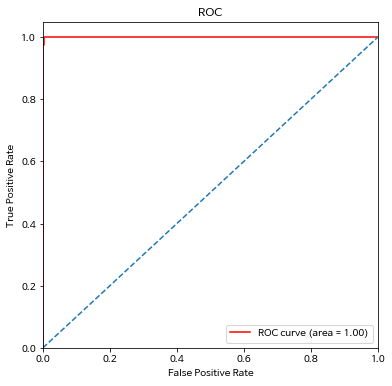

In [248]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='r', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

# 이하가 실제 모델

In [92]:
#movie = pd.read_excel('data/영화정보 삭제1.xlsx', encoding='CP949')
movie = pd.read_csv('data/영화정보2.csv', encoding='CP949')


In [94]:
movie = movie.fillna(0)

In [95]:
movie

,영화명,매출액,관객수,대표국적,배급사,제작국가,감독,장르1,장르2,장르3,장르4,장르5,장르6,장르7
0,명량,1.360000e+11,17613682.0,3,3,한국,2.4,사극,액션,0,0,0,0,0
1,베테랑,1.050000e+11,13414009.0,3,3,한국,2.8,액션,드라마,0,0,0,0,0
2,도둑들,9.366481e+10,12983178.0,3,2.9,"한국,홍콩",3,액션,범죄,0,0,0,0,0
3,7번방의 선물,9.143191e+10,12811206.0,3,2.8,한국,0.8,코미디,드라마,0,0,0,0,0
4,암살,9.846313e+10,12705700.0,3,2.9,한국,3,액션,드라마,0,0,0,0,0
5,"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,3,한국,1.3,사극,드라마,0,0,0,0,0
6,신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,한국,2.7,판타지,드라마,0,0,0,0,0
7,택시운전사,9.585365e+10,12186327.0,3,2.9,한국,2.1,드라마,0,0,0,0,0,0
8,부산행,9.317828e+10,11565479.0,3,2.8,한국,0.4,액션,스릴러,0,0,0,0,0
9,해운대,8.102500e+10,11324433.0,3,2.6,한국,2.2,액션,드라마,어드벤처,0,0,0,0


제작국가, 장르 1 빼고 다 날리자

In [346]:
movie = movie.set_index('영화명')
movie


KeyError: '영화명'

In [348]:
movie.columns

Index(['매출액', '관객수', '대표국적', '배급사', '제작국가', '감독', '장르1', '장르2', '장르3', '장르4',
       '장르5', '장르6', '장르7'],
      dtype='object')

In [349]:
list=['매출액', '관객수', '대표국적','배급사','감독', '장르1']

In [350]:
movie2 =movie[list]

In [351]:
movie2 # 대표국적 한국 = 3 미국 -=2 일본 1 그외 0 으로 점수화

,매출액,관객수,대표국적,배급사,감독,장르1
영화명,,,,,,
명량,1.360000e+11,17613682.0,3,3,2.4,사극
베테랑,1.050000e+11,13414009.0,3,3,2.8,액션
도둑들,9.366481e+10,12983178.0,3,2.9,3,액션
7번방의 선물,9.143191e+10,12811206.0,3,2.8,0.8,코미디
암살,9.846313e+10,12705700.0,3,2.9,3,액션
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,3,1.3,사극
신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,2.7,판타지
택시운전사,9.585365e+10,12186327.0,3,2.9,2.1,드라마
부산행,9.317828e+10,11565479.0,3,2.8,0.4,액션


In [352]:
movie2['감독']

영화명
명량                          2.4
베테랑                         2.8
도둑들                           3
7번방의 선물                     0.8
암살                            3
광해, 왕이 된 남자                 1.3
신과함께-인과 연                   2.7
택시운전사                       2.1
부산행                         0.4
해운대                         2.2
어벤져스: 인피니티 워                1.8
괴물                          2.3
어벤져스: 에이지 오브 울트론            1.2
겨울왕국                크리스 벅,제니퍼 리
인터스텔라                       2.6
왕의 남자                       2.5
검사외전                        이일형
설국열차                        2.3
관상                          한재림
아이언맨 3                    쉐인 블랙
국제시장                        2.2
캡틴 아메리카: 시빌 워               1.8
해적: 바다로 간 산적                1.7
수상한 그녀                      1.4
신과함께-죄와 벌                   2.7
아바타                     제임스 카메론
국가대표                        2.7
디워                          심형래
공조                          1.9
트랜스포머 3                     2.9
                       ...     
50가지

In [353]:
d=[]
for dic in movie2["감독"]:
    try:
        a= float(dic)
    except ValueError:
        dic=0.1
        a =float(dic)
    d.append(a)   

In [354]:
d

[2.4,
 2.8,
 3.0,
 0.8,
 3.0,
 1.3,
 2.7,
 2.1,
 0.4,
 2.2,
 1.8,
 2.3,
 1.2,
 0.1,
 2.6,
 2.5,
 0.1,
 2.3,
 0.1,
 0.1,
 2.2,
 1.8,
 1.7,
 1.4,
 2.7,
 0.1,
 2.7,
 0.1,
 1.9,
 2.9,
 0.1,
 2.4,
 2.9,
 2.9,
 1.1,
 0.1,
 2.8,
 1.9,
 1.2,
 0.1,
 0.1,
 0.1,
 0.0,
 0.1,
 0.5,
 0.1,
 0.0,
 0.1,
 0.1,
 2.8,
 0.6,
 0.1,
 2.6,
 2.5,
 0.1,
 0.7,
 0.6,
 0.1,
 0.0,
 2.6,
 0.1,
 0.0,
 3.0,
 0.1,
 0.1,
 0.1,
 0.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 2.1,
 0.1,
 0.0,
 0.1,
 0.0,
 0.1,
 2.9,
 0.1,
 0.0,
 0.1,
 0.0,
 1.7,
 0.1,
 0.1,
 0.1,
 0.1,
 0.5,
 0.1,
 0.9,
 0.1,
 0.7,
 0.1,
 0.1,
 0.3,
 0.1,
 0.1,
 0.1,
 0.9,
 0.9,
 0.1,
 0.1,
 0.1,
 1.4,
 2.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 2.0,
 1.1,
 1.0,
 0.1,
 1.6,
 0.1,
 0.1,
 0.1,
 0.1,
 0.2,
 0.1,
 0.1,
 2.6,
 1.7,
 0.1,
 0.1,
 0.1,
 1.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.0,
 0.1,
 1.4,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 2.0,
 0.1,
 1.0,
 0.1,
 0.1,
 3.0,
 0.1,
 0.1,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.1,
 1.9

In [355]:
df = pd.DataFrame(d)

df=df.rename(columns = {0:'감독'})


In [356]:
d1=[]
for dic in movie2["배급사"]:
    print(dic)
    try:
        a= float(dic)
    except ValueError:
        dic=0.1
        a =float(dic)
    d1.append(a)   

3
3
2.9
2.8
2.9
3
2.7
2.9
2.8
2.6
2.5
2.9
2.5
2.3
2.2
2.1
2.9
3
2.9
2.3
3
2.5
2
3
2
0.4
2.9
2.9
3
3
2.2
2
2.6
2.6
3
1.8
3
2.9
1.7
2.9
3
2.9
0
2.9
1.6
1.5
0
2.6
3
3
2.7
2.9
2.2
2.9
2.6
1.6
2
2.8
0
2.2
2.8
0
2.6
1.4
2
2.8
0
2
2
1.4
2.8
2.5
2.5
3
2.8
2.9
2.5
0
2.8
0
3
3
2
0
2.5
0
3
1
2.6
2.8
3
2.9
3
3
2.5
1.6
3
2.8
1.6
2.5
1.7
2.9
2.9
2.9
2.5
2.2
2.8
3
2.2
2.6
2.7
2.8
1.7
1.4
2.9
3
2
2.6
2.2
2
1.6
2.8
2.6,2.1
2.6
3
2.9
2.3
2.6
2
1.4
주식회사 해리슨앤컴퍼니,2.2
3
2
(주)싸이더스
2.9
2,(주)싸이더스
2.8
1.6
3
2.3
브에나비스타인터내셔널코리아
2.9
1.8
2.9
0
2
3
CGV아트하우스,(주)대명문화공장
2.2
2.9
1.6
2.6
2.2
1.4
1.6
1.4
1.1
2.6
2.2
(주)와우픽쳐스
0
0
1.7
2.9
2.5
2.8
2.9
3
0
판씨네마(주)
3
1.7
2.6
2.6
2
1.4
1.6
2.2
2.9
2,(주)리틀빅픽쳐스
1.4
2
2.9
2.2
1.4
주식회사 해리슨앤컴퍼니,2.2
2.2
0
1.3
3
3
2.1
1.7
3
2.6
아이러브시네마
2
2.5
2.8
2.3
2.6
2.5
2.9
소니픽쳐스릴리징코리아
2.6
2
3
2.6
3
2.6
2.6
2
2.6
1.3
2.2
1.8
2.9
(주)인벤트스톤,영화사청어람(주)
1.6
㈜인디스토리
2.9
1.7
2.9
1.4
0
1.4
3
2.5
2.6
1.1
1.6
2.5
2.5
2.2
3
1.6
1.6
2.5
2.9
2.6
1.7
2
1.6
2
0
2.6
2.9
2
2.9
2.6
2.9
2.8
1
2.2
2.6
2
0
3
1.4
2
1.4
2

2
(주)싸이더스
2
영화사청어람(주),(주)엠엔에프씨
에스케이텔레콤(주)
1
필라멘트픽쳐스
(주)영화사구안
CGV아트하우스
㈜스튜디오이쩜영
예지림엔터테인먼트
(주)프라임엔터테인먼트
(주)더블앤조이픽쳐스
2
파이오니아21
씨네그루(주)키다리이엔티
2.6
KT&G 상상마당 영화사업팀 컴퍼니에스에스(주)
0
(주)영화사 진진
오드
2
그린나래미디어(주)
판씨네마(주)
0
0
0
(주)싸이더스
(주)성원아이컴
1.7
3
0
㈜스튜디오이쩜영
2.8
(주)티캐스트
(주)스마일이엔티
0
㈜케이디미디어
1.4
(주)화앤담이엔티
판씨네마(주)
(주)싸이더스,(주)디스테이션
(주)영화사 빅
(주)팝엔터테인먼트,쇼이스트(주)
3
(주)박수엔터테인먼트
0
2.2
0
0
2.6
씨네그루(주)키다리이엔티,(주)삼백상회
2.2
1.4
(주)박수엔터테인먼트
2
3
소니픽쳐스릴리징코리아
0
영화사청어람(주)
1.3
(주)스폰지이엔티
씨네그루(주)키다리이엔티
2
타임스토리그룹(주)
0
㈜코리아스크린,와이드 릴리즈(주)
0
1
0
0
(주)마인스 엔터테인먼트
2.8
2.2
영화사청어람(주),(주)엠엔에프씨
씨너스엔터테인먼트(주)
1
(주)영화사 빅
1.4
스폰지
(주)영화사 빅
0
2
2.6
팝엔터테인먼트
2.2
(주)영화사 빅
(주)영화사 그램,(재)CBS
0
2.6
그린나래미디어(주)
2.1
판씨네마(주)
(주)화앤담이엔티
1.4
(주)튜브엔터테인먼트
(주)화앤담이엔티
2.9
2
에이원엔터테인먼트
1.4
1.6
0
㈜케이디미디어
2
(주)이수C&E
1.8
쇼이스트(주)
1.1
브에나비스타인터내셔널코리아
2
1.7
1.4
CGV아트하우스
1.4
씨너스엔터테인먼트(주)
2.2
㈜케이디미디어
2.9
0
0
0
(주)프라임엔터테인먼트
에이원엔터테인먼트
1.1
씨네그루(주)키다리이엔티
2.8
(주)박수엔터테인먼트
CGV아트하우스
(주)영화사 빅
(주)디스테이션
1.7
(주)영화제작전원사 ,2.8
1
판씨네마(주)
(주)박수엔터테인먼트,에이원엔터테인먼트
(주)미디어데이
㈜코리아스크린
1.7
(주)새

(주)스폰지이엔티
0
(주)프레인글로벌
㈜메가박스
0
(주)영화사 진진,아트플러스시네마네트워크
0
0
(주)블룸즈베리리소시스리미티드
오드
주식회사 마운틴픽쳐스
0
0
프리비젼엔터테인먼트
윤스
주식회사 마운틴픽쳐스
주식회사 씨네룩스
㈜인디스토리
주식회사 마운틴픽쳐스
(재)전주국제영화제조직위원회
(주)미디어데이
(주)마인스 엔터테인먼트
0
㈜영화사 백두대간
㈜인디스토리,시네마달
(주)소나무픽쳐스
(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스
주식회사 씨네룩스
0
(주)디스테이션
씨네그루(주)다우기술
0
(주)퍼스트런
0
0
(주)엣나인필름
52DAYS FILM
(주)서태지컴퍼니
(주)미로비젼
프리비젼엔터테인먼트
1.7
(주)이모션픽처스
(주)드림팩트엔터테인먼트
(주)드림팩트엔터테인먼트
0
(주)케이알씨지
(주)판다미디어
주식회사 마운틴픽쳐스
(주)머스트씨무비릴리징컴퍼니
0
(주)시네마달
실버스푼
프리비젼엔터테인먼트
(주)영화사 진진
CGV아트하우스
(주)미디어캐슬
0
0
(주)엣나인필름
(주)인디플러그
0
㈜인디스토리
(주)스마일이엔티
(주)소나무픽쳐스
(주)인벤트스톤
예지림엔터테인먼트
(주)소나무픽쳐스
예지림엔터테인먼트,미디어소프트
(유)영화사 화수분
주식회사 씨네룩스
(주)나이너스엔터테인먼트
(주)프레인글로벌
(주)영화사 빅
㈜인디스토리
(주)도키엔터테인먼트,예지림엔터테인먼트
(주) 루스이소니도스
와이드 릴리즈(주)
판씨네마(주)
0
0
㈜인디스토리
하준사
(주)케빈앤컴퍼니
0
0
0
에스디시코리아 주식회사
(주)영화사오원
(주)동숭아트센터
0
스크린조이
프리비젼엔터테인먼트
(주)오렌지옐로우하임,홀리가든
골든타이드픽처스(주)
주식회사 디에스이이디
브릿지웍스 엔터테인먼트(주)
0
다솔기획,(주)추억을 파는 극장
데이브인터랙티브
(주)영화사 안다미로
(주)프레인글로벌
0
(주)소나무픽쳐스
(주)인스터피씨엠
0
0
0
(주)소나무픽쳐스
0
0
(주)팝엔터테인먼트
㈜인디스토리
㈜인디스토리
(주)시네마달
아트플러스시네마네트워크
찬란
(주)동숭아트센터
0
0
0
(주)디

(유)조이앤컨텐츠그룹
0
팝엔터테인먼트
0
(주)라이크 콘텐츠
(주)케이알씨지
0
0
(주)씨네로닷컴
0
예지림엔터테인먼트
(주)스폰지이엔티
0
0
0
(주)케이알씨지
(주)아바엔터테인먼트
0
0
주식회사 마운틴픽쳐스
(주)콘텐츠판다
0
0
뎁스프로덕션
0
0
0
0
0
0
0
(주)에이치엠엔
실버스푼
0
0
0
0
0
0
0
(주)유비네트워크
0
하준사
0
노바엔터테인먼트
0
롯데쇼핑㈜롯데시네마
0
0
0
0
크리스리픽쳐스인터내셔널(주)
0
(주)미디어데이
0
㈜영화사 백두대간
CGV아트하우스
0
0
드림로드
0
주식회사 루믹스미디어
0
이돌영화사
0
라인트리엔터테인먼트
0
0
0
0
(주)시네마달
0
0
0
0
(주)팝엔터테인먼트
0
0
0
0
0
0
0
0
이미지팩토리
(주)케이알씨지
(주)액티버스엔터테인먼트
0
0
0
(주)고맙습니다 사랑합니다
2.6
(주)영화사 진진
0
0
0
(주)케이알씨지
0
0
(주)유비네트워크
0
㈜스튜디오이쩜영
0
0
(주)스튜디오후크
팝엔터테인먼트
(주)영화사 안다미로
0
0
0
0
0
0
0
0
0
가실
(주)나우콘텐츠
TCO(주)더콘텐츠온
0
0
0
(주)아르떼
(주)전망좋은 영화사
TCO(주)더콘텐츠온
(주)에스와이코마드
시네마달
(주)에스와이코마드
0
0
스크린조이
(주)케이알씨지
0
(주)인디플러그
0
0
0
0
0
0
0
0
0
0
0
미디어소프트
어뮤즈
0
0
0
0
0
0
0
프리비젼엔터테인먼트
0
0
(주)케이알씨지
주식회사 마운틴픽쳐스
CGV아트하우스
0
0
(주)케이알씨지
0
전망 PRODUCTION
0
THE 픽쳐스
0
0
0
0
0
0
(주)케이알씨지
0
(주)김기덕 필름
(주)케이알씨지
(주)마부엔터테인먼트
봄바람영화사
0
0
0
프리비젼엔터테인먼트
0
라인트리엔터테인먼트
0
팝엔터테인먼트
0
0
0
0
에스디시코리아 주식회사
(주)영화사 사계절
알토미디어(주)
0
0
(주)케이알씨지
0
0
0
2.6
0
0
0
0
0
0
윤스
어뮤즈
0
주식회사 루믹스미디어
0
(주)이모션픽처스
라인트리엔터테인먼

㈜코리아스크린
모비딕엔터테인먼트(주)
모비딕엔터테인먼트(주)
(주)무브먼트 픽쳐스
모비딕엔터테인먼트(주)
씨네힐
(주)웃기씨네
㈜코리아스크린
(주)에스와이미디어
모비딕엔터테인먼트(주)
모비딕엔터테인먼트(주)
(주)소나무픽쳐스
스크린조이
레지스탕스 필름,(주)파란프로덕션
(유)조이앤컨텐츠그룹
(주)마노엔터테인먼트
(주)케이알씨지
(유)조이앤컨텐츠그룹
(주)케이알씨지
(주)케이알씨지
(주)소나무픽쳐스
(주)동아수출공사
(주)도키엔터테인먼트
스크린조이
(주)케이알씨지
(주)에스와이미디어
(주)에스와이미디어
(주)에스와이미디어
(주)에스와이미디어
(주)소나무픽쳐스
(주)에스와이미디어
모비딕엔터테인먼트(주)
(주)영진크리에이티브
(주)케이알씨지
케이티하이텔(주)
(주)콘텐츠윙
주식회사 풍경소리
주식회사 풍경소리
(주)아이아스플러스
(주)액티버스엔터테인먼트
(주)액티버스엔터테인먼트
(주)도키엔터테인먼트
스크린조이
스크린조이
시네마달
TCO(주)더콘텐츠온
(주)누리픽쳐스
주식회사 씨엠닉스
주식회사 풍경소리
이상우 필름
(주)케이알씨지
판씨네마(주)
(주)컴퍼니엘
스크린조이
2.5
주식회사 풍경소리
주식회사 풍경소리
이상우 필름
주식회사 레드아이스
노네임 필름
영화사 마농(주)
(주)소나무픽쳐스
주식회사 풍경소리
스크린조이
스크린조이
(주)아이엠비씨
(주)아이엠비씨
(주)케이알씨지
㈜코리아스크린
이상우 필름
(주)도키엔터테인먼트
THE 픽쳐스
에이원엔터테인먼트
㈜코리아스크린
㈜메가박스
㈜크래커픽쳐스
프리비젼엔터테인먼트
(주)케이앤엔터테인먼트
(유)조이앤시네마
(주)케이알씨지
(주)케이알씨지
스크린조이
더컨텐츠콤(주)
(주)스토리제이
노바엔터테인먼트
THE 픽쳐스
㈜인디스토리
주식회사 마운틴픽쳐스
(주)비엠컬쳐스
라인트리엔터테인먼트
㈜코리아스크린
올드웨일
씨네그루(주)키다리이엔티
주식회사 풍경소리
윤스
(주)컴퍼니엘
(주)액티버스엔터테인먼트
어뮤즈
(주)케이알씨지
(주)케이알씨지
주식회사 풍경소리
주식회사 풍경소리
(주)케이알씨지
(주)드림웨스트픽쳐스
프리비젼엔터테인먼트
(주

In [357]:
d1

[3.0,
 3.0,
 2.9,
 2.8,
 2.9,
 3.0,
 2.7,
 2.9,
 2.8,
 2.6,
 2.5,
 2.9,
 2.5,
 2.3,
 2.2,
 2.1,
 2.9,
 3.0,
 2.9,
 2.3,
 3.0,
 2.5,
 2.0,
 3.0,
 2.0,
 0.4,
 2.9,
 2.9,
 3.0,
 3.0,
 2.2,
 2.0,
 2.6,
 2.6,
 3.0,
 1.8,
 3.0,
 2.9,
 1.7,
 2.9,
 3.0,
 2.9,
 0.0,
 2.9,
 1.6,
 1.5,
 0.0,
 2.6,
 3.0,
 3.0,
 2.7,
 2.9,
 2.2,
 2.9,
 2.6,
 1.6,
 2.0,
 2.8,
 0.0,
 2.2,
 2.8,
 0.0,
 2.6,
 1.4,
 2.0,
 2.8,
 0.0,
 2.0,
 2.0,
 1.4,
 2.8,
 2.5,
 2.5,
 3.0,
 2.8,
 2.9,
 2.5,
 0.0,
 2.8,
 0.0,
 3.0,
 3.0,
 2.0,
 0.0,
 2.5,
 0.0,
 3.0,
 1.0,
 2.6,
 2.8,
 3.0,
 2.9,
 3.0,
 3.0,
 2.5,
 1.6,
 3.0,
 2.8,
 1.6,
 2.5,
 1.7,
 2.9,
 2.9,
 2.9,
 2.5,
 2.2,
 2.8,
 3.0,
 2.2,
 2.6,
 2.7,
 2.8,
 1.7,
 1.4,
 2.9,
 3.0,
 2.0,
 2.6,
 2.2,
 2.0,
 1.6,
 2.8,
 0.1,
 2.6,
 3.0,
 2.9,
 2.3,
 2.6,
 2.0,
 1.4,
 0.1,
 3.0,
 2.0,
 0.1,
 2.9,
 0.1,
 2.8,
 1.6,
 3.0,
 2.3,
 0.1,
 2.9,
 1.8,
 2.9,
 0.0,
 2.0,
 3.0,
 0.1,
 2.2,
 2.9,
 1.6,
 2.6,
 2.2,
 1.4,
 1.6,
 1.4,
 1.1,
 2.6,
 2.2,
 0.1,
 0.0,
 0.0,
 1.7,
 2.9,
 2.5,
 2.8,
 2.9

In [358]:
df1 = pd.DataFrame(d1)

df1=df1.rename(columns = {0:'배급사'})

In [359]:
movie2.columns

Index(['매출액', '관객수', '대표국적', '배급사', '감독', '장르1'], dtype='object')

In [360]:
col= ['매출액', '관객수', '대표국적', '장르1']
movie3 = movie2[col]

In [361]:
movie3

,매출액,관객수,대표국적,장르1
영화명,,,,
명량,1.360000e+11,17613682.0,3,사극
베테랑,1.050000e+11,13414009.0,3,액션
도둑들,9.366481e+10,12983178.0,3,액션
7번방의 선물,9.143191e+10,12811206.0,3,코미디
암살,9.846313e+10,12705700.0,3,액션
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,사극
신과함께-인과 연,1.030000e+11,12274163.0,3,판타지
택시운전사,9.585365e+10,12186327.0,3,드라마
부산행,9.317828e+10,11565479.0,3,액션


In [362]:
movie2.index

Index([          '명량',          '베테랑',          '도둑들',      '7번방의 선물',
                 '암살',  '광해, 왕이 된 남자',    '신과함께-인과 연',        '택시운전사',
                '부산행',          '해운대',
       ...
         'ＡＶ여배우의 자취방',        '레드 바론',          '위스퍼',   '최면섹스-상담테크닉',
       '그라비아 아이돌의 운명',  '새엄마: 금지된 욕망',  '아버지의 후처는 비서',      '다빈치 트레져',
             '신부와 편견',        '멘 투 비'],
      dtype='object', name='영화명', length=14656)

In [363]:
df.index=movie2.index
df1.index=movie2.index


In [364]:
df

,감독
영화명,
명량,2.4
베테랑,2.8
도둑들,3.0
7번방의 선물,0.8
암살,3.0
"광해, 왕이 된 남자",1.3
신과함께-인과 연,2.7
택시운전사,2.1
부산행,0.4


In [365]:
df1

,배급사
영화명,
명량,3.0
베테랑,3.0
도둑들,2.9
7번방의 선물,2.8
암살,2.9
"광해, 왕이 된 남자",3.0
신과함께-인과 연,2.7
택시운전사,2.9
부산행,2.8


In [377]:
movie3

,매출액,관객수,대표국적,장르1
영화명,,,,
명량,1.360000e+11,17613682.0,3,사극
베테랑,1.050000e+11,13414009.0,3,액션
도둑들,9.366481e+10,12983178.0,3,액션
7번방의 선물,9.143191e+10,12811206.0,3,코미디
암살,9.846313e+10,12705700.0,3,액션
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,사극
신과함께-인과 연,1.030000e+11,12274163.0,3,판타지
택시운전사,9.585365e+10,12186327.0,3,드라마
부산행,9.317828e+10,11565479.0,3,액션


In [378]:
movie4=pd.concat([movie3,df], axis=1)

In [379]:
movie4=pd.concat([movie4,df1], axis=1)

In [380]:
movie4

,매출액,관객수,대표국적,장르1,감독,배급사
영화명,,,,,,
명량,1.360000e+11,17613682.0,3,사극,2.4,3.0
베테랑,1.050000e+11,13414009.0,3,액션,2.8,3.0
도둑들,9.366481e+10,12983178.0,3,액션,3.0,2.9
7번방의 선물,9.143191e+10,12811206.0,3,코미디,0.8,2.8
암살,9.846313e+10,12705700.0,3,액션,3.0,2.9
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,사극,1.3,3.0
신과함께-인과 연,1.030000e+11,12274163.0,3,판타지,2.7,2.7
택시운전사,9.585365e+10,12186327.0,3,드라마,2.1,2.9
부산행,9.317828e+10,11565479.0,3,액션,0.4,2.8


In [381]:
genre=pd.get_dummies(movie4['장르1'])

In [383]:
genre=genre.rename(columns = {0:'성인'})

In [384]:
movie4=pd.concat([movie4,genre], axis=1)

감독, 국적 장르에 따라 점수화 ->cut 써서 카테고리화해서 수치데이터로 변경하자.

In [385]:
movie4.columns

Index(['매출액', '관객수', '대표국적', '장르1', '감독', '배급사', '성인', 'SF', '가족', '공연',
       '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극',
       '서부극(웨스턴)', '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디',
       '판타지'],
      dtype='object')

In [386]:
col=   ['매출액', '관객수', '대표국적', '감독', '배급사', '성인', 'SF', '가족', '공연',
       '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극',
       '서부극(웨스턴)', '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디',
       '판타지']

In [387]:
movie4=movie4[col]

In [388]:
movie4

,매출액,관객수,대표국적,감독,배급사,성인,SF,가족,공연,공포(호러),...,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지
영화명,,,,,,,,,,,,,,,,,,,,,
명량,1.360000e+11,17613682.0,3,2.4,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
베테랑,1.050000e+11,13414009.0,3,2.8,3.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
도둑들,9.366481e+10,12983178.0,3,3.0,2.9,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7번방의 선물,9.143191e+10,12811206.0,3,0.8,2.8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
암살,9.846313e+10,12705700.0,3,3.0,2.9,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,1.3,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,2.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
택시운전사,9.585365e+10,12186327.0,3,2.1,2.9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
부산행,9.317828e+10,11565479.0,3,0.4,2.8,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [393]:
mybin = (0,1000000,20000000)
group_names = [0,1]
movie4['흥행']=pd.cut(movie4['관객수'], bins=mybin, labels = group_names)

In [437]:
movie4

,매출액,관객수,대표국적,감독,배급사,성인,SF,가족,공연,공포(호러),...,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지,흥행
영화명,,,,,,,,,,,,,,,,,,,,,
명량,1.360000e+11,17613682.0,3,2.4,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
베테랑,1.050000e+11,13414009.0,3,2.8,3.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
도둑들,9.366481e+10,12983178.0,3,3.0,2.9,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
7번방의 선물,9.143191e+10,12811206.0,3,0.8,2.8,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
암살,9.846313e+10,12705700.0,3,3.0,2.9,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,1.3,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,2.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
택시운전사,9.585365e+10,12186327.0,3,2.1,2.9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
부산행,9.317828e+10,11565479.0,3,0.4,2.8,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0


In [439]:
movie4['흥행'].unique()

[1.0, NaN, 0.0]
Categories (2, int64): [0 < 1]

In [441]:
##Nan 데이터 처리
movie4= movie4[pd.notnull(movie4['흥행'])] # NaN index 지움

In [442]:
movie4['흥행'].unique()

[1, 0]
Categories (2, int64): [0 < 1]

In [453]:
movie4.columns

Index(['매출액', '관객수', '대표국적', '감독', '배급사', '성인', 'SF', '가족', '공연', '공포(호러)',
       '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
       '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지', '흥행'],
      dtype='object')

In [456]:
movie4['감독'].unique()

array([2.4, 2.8, 3. , 0.8, 1.3, 2.7, 2.1, 0.4, 2.2, 1.8, 2.3, 1.2, 0.1,
       2.6, 2.5, 1.7, 1.4, 1.9, 2.9, 1.1, 0.5, 0.6, 0.7, 0.9, 0.3, 2. ,
       1. , 1.6, 0.2])

In [457]:
movie4['배급사'].unique()

array([3. , 2.9, 2.8, 2.7, 2.6, 2.5, 2.3, 2.2, 2.1, 2. , 0.4, 1.8, 1.7,
       1.6, 1.5, 1.4, 1. , 0.1, 1.1, 1.3])

In [458]:
movie4['매출액'].unique()

array([1.36000000e+11, 1.05000000e+11, 9.36648085e+10, ...,
       6.60000000e+03, 1.00000000e+03, 8.80000000e+03])

In [444]:
see=['대표국적', '감독', '배급사', '성인', 'SF', '가족', '공연', '공포(호러)',
       '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
       '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [459]:
movie5=movie4[see]

In [460]:
X= movie5
y=movie4['흥행']

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [462]:
X_new.shape

(10806, 25)

In [463]:
y.shape

(10806,)

In [464]:
sc = preprocessing.StandardScaler()
X = sc.fit_transform(X_new)

/home/mll/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mll/.local/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [477]:
X[:5]

array([[ 1.26611950e+00,  1.06828278e+01,  2.99786171e+00,
        -7.43361424e-01, -1.17030167e-01, -7.08683387e-02,
        -7.83916539e-02, -1.81330919e-01, -4.08475284e-02,
        -1.81874665e-01, -4.31473110e-01, -3.19164556e-01,
        -4.81548996e-02, -1.01411135e-01, -1.39060412e-01,
         1.54639365e+01, -1.36057570e-02, -1.86706246e-01,
        -1.65178577e-01, -2.53399188e-01, -2.85989456e-01,
        -7.59648780e-02, -6.01845402e-02, -2.40748132e-01,
        -9.21562106e-02],
       [ 1.26611950e+00,  1.25588264e+01,  2.99786171e+00,
        -7.43361424e-01, -1.17030167e-01, -7.08683387e-02,
        -7.83916539e-02, -1.81330919e-01, -4.08475284e-02,
        -1.81874665e-01, -4.31473110e-01, -3.19164556e-01,
        -4.81548996e-02, -1.01411135e-01, -1.39060412e-01,
        -6.46665872e-02, -1.36057570e-02, -1.86706246e-01,
        -1.65178577e-01, -2.53399188e-01,  3.49663241e+00,
        -7.59648780e-02, -6.01845402e-02, -2.40748132e-01,
        -9.21562106e-02],
    

In [478]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)

/home/mll/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9518963922294172

In [479]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9477335800185014

In [480]:
rfc = RandomForestClassifier(n_estimators=300) 
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.9486586493987049

In [481]:
# estimator = 모델, cv는 분할 테스트 숫자
rfc_eval = cross_val_score(rfc, X = X, y = y, cv = 5)  
rfc_eval  # 5번의 교차 검증 결과를 보여준다

array([0.67160037, 0.94958372, 0.9467839 , 0.95465062, 0.95      ])

In [482]:
rfc_eval.mean()

0.8945237219723456

In [483]:
y_pred = sgd.predict(X_test)
confusion_matrix(y_test, y_pred)
# RandomForest에 대한 confusion_matrix

array([[2053,    3],
       [ 101,    5]])

In [484]:
# 여러 성능 지표를 출력한다
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2056
           1       0.62      0.05      0.09       106

   micro avg       0.95      0.95      0.95      2162
   macro avg       0.79      0.52      0.53      2162
weighted avg       0.94      0.95      0.93      2162



In [485]:
y_score = sgd.decision_function(X_test)

In [486]:
result = pd.DataFrame(y_pred, columns=['predict'])
result['real'] = y_test.values
result['correct'] = (result.predict == result.real)
result['score'] = y_score
result

,predict,real,correct,score
0,0,0,True,-5.650281
1,0,0,True,-7.685605
2,0,0,True,-6.328722
3,0,0,True,-8.137899
4,0,0,True,-6.328722
5,0,0,True,-4.858766
6,0,0,True,-5.650281
7,0,0,True,-8.137899
8,0,0,True,-4.700463
9,0,0,True,-3.841104


In [487]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

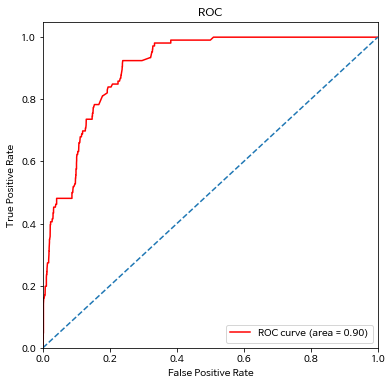

In [488]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='r', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

# 모델 구현완료, 검증용 데이터로 모델이 정확히 동작하는지 검증하기